<a href="https://colab.research.google.com/github/hscrown/madatpublicdata/blob/main/SVD%EB%A5%BC_MLP_NCF%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

In [11]:
#jsonÎ∂àÎü¨Ïò§Í∏∞
df = pd.read_json('user_rating_1000.json')


# ReLu ÏÇ¨Ïö©

In [12]:


# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
non_zero_df = df[df['rating'] != 0]
pivot_table = non_zero_df.pivot(index='user_id', columns='place_id', values='rating').fillna(0)
train, test = train_test_split(pivot_table, test_size=0.2, random_state=42)

train_users, train_items = np.where(train > 0)
train_ratings = train.values[train > 0]

test_users, test_items = np.where(test > 0)
test_ratings = test.values[test > 0]

# Î™®Îç∏ ÏûÖÎ†•
user_input = Input(shape=(1,), dtype='int32')
item_input = Input(shape=(1,), dtype='int32')

# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
user_embedding = Embedding(input_dim=pivot_table.shape[0], output_dim=15, input_length=1)(user_input)
item_embedding = Embedding(input_dim=pivot_table.shape[1], output_dim=15, input_length=1)(item_input)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÌèâÌÉÑÌôî
user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ïó∞Í≤∞
concatenated = Concatenate()([user_vector, item_vector])

# MLP Î†àÏù¥Ïñ¥
mlp_layer = Dense(128, activation='relu')(concatenated)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(64, activation='relu')(mlp_layer)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(32, activation='relu')(mlp_layer)
mlp_layer = Dense(1)(mlp_layer)  # ÌèâÏ†ê ÏòàÏ∏°

# Î™®Îç∏ ÏÉùÏÑ± Î∞è Ïª¥ÌååÏùº
model = Model(inputs=[user_input, item_input], outputs=mlp_layer)
model.compile(optimizer=Adam(0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Î™®Îç∏ ÏöîÏïΩ
model.summary()

# ÏñºÎ¶¨Ïä§ÌÉÄÌïë ÏÑ§Ï†ï
early_stopping = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    [train_users, train_items], train_ratings,
    validation_data=([test_users, test_items], test_ratings),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 15)                15000     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 15)                24945     ['input_2[0][0]']             
                                                                                              

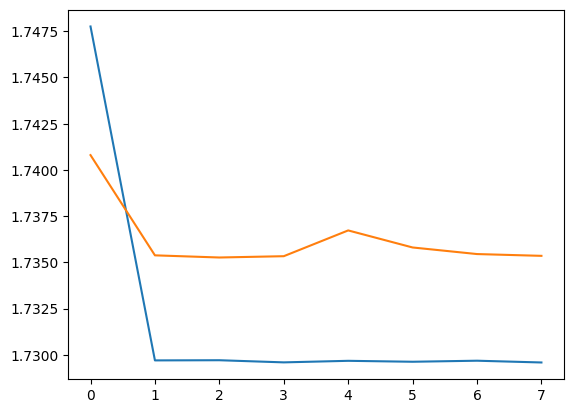

In [20]:
# train lossÏôÄ val loss Í∞ôÏù¥ ÏãúÍ∞ÅÌôî
# plt.plot(history.history['root_mean_squared_error'])
# plt.plot(history.history['val_root_mean_squared_error'])

# # train mseÏôÄ val mse ÏãúÍ∞ÅÌôî
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Î™®Îç∏Ïù¥ ÌäπÏ†ï ÏàòÏ§ÄÏùò ÏÑ±Îä•Ïóê ÎèÑÎã¨Ìïú ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌïôÏäµÏúºÎ°ú ÌÅ¨Í≤å Í∞úÏÑ†ÎêòÏßÄ ÏïäÏïòÏùå.

# LeakyReLu ÏÇ¨Ïö©

In [24]:
from tensorflow.keras.layers import LeakyReLU

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
non_zero_df = df[df['rating'] != 0]
pivot_table = non_zero_df.pivot(index='user_id', columns='place_id', values='rating').fillna(0)
train, test = train_test_split(pivot_table, test_size=0.2, random_state=42)

train_users, train_items = np.where(train > 0)
train_ratings = train.values[train > 0]

test_users, test_items = np.where(test > 0)
test_ratings = test.values[test > 0]

# Î™®Îç∏ ÏûÖÎ†•
user_input = Input(shape=(1,), dtype='int32')
item_input = Input(shape=(1,), dtype='int32')

# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
user_embedding = Embedding(input_dim=pivot_table.shape[0], output_dim=15, input_length=1)(user_input)
item_embedding = Embedding(input_dim=pivot_table.shape[1], output_dim=15, input_length=1)(item_input)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÌèâÌÉÑÌôî
user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ïó∞Í≤∞
concatenated = Concatenate()([user_vector, item_vector])

# MLP Î†àÏù¥Ïñ¥
mlp_layer = Dense(128)(concatenated)
mlp_layer = LeakyReLU(alpha=0.01)(mlp_layer)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(64)(mlp_layer)
mlp_layer = LeakyReLU(alpha=0.01)(mlp_layer)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(32)(mlp_layer)
mlp_layer = LeakyReLU(alpha=0.01)(mlp_layer)
mlp_layer = Dense(1)(mlp_layer)  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ ÌôúÏÑ±Ìôî Ìï®Ïàò ÏóÜÏùå


# Î™®Îç∏ ÏÉùÏÑ± Î∞è Ïª¥ÌååÏùº
model = Model(inputs=[user_input, item_input], outputs=mlp_layer)
model.compile(optimizer=Adam(0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Î™®Îç∏ ÏöîÏïΩ
model.summary()

# ÏñºÎ¶¨Ïä§ÌÉÄÌïë ÏÑ§Ï†ï
early_stopping = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    [train_users, train_items], train_ratings,
    validation_data=([test_users, test_items], test_ratings),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 1, 15)                15000     ['input_7[0][0]']             
                                                                                                  
 embedding_7 (Embedding)     (None, 1, 15)                24945     ['input_8[0][0]']             
                                                                                            

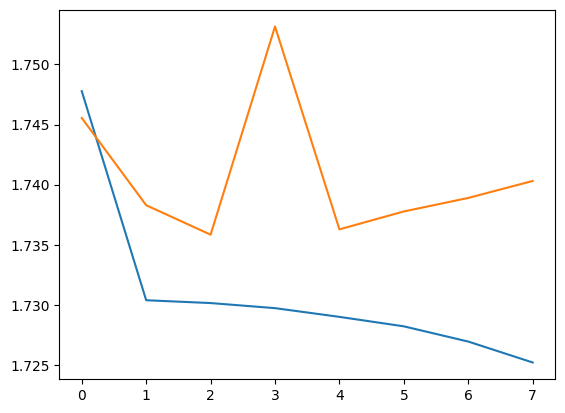

In [26]:
# # train mseÏôÄ val mse ÏãúÍ∞ÅÌôî
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

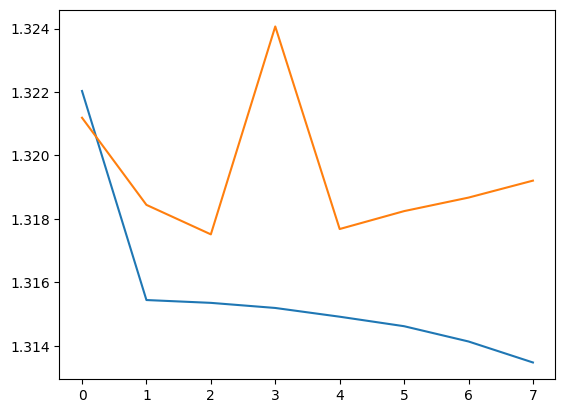

In [25]:
# ÏãúÍ∞ÅÌôî
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

ReLuÎ•º LeakyReLu Î°ú Î∞îÍø®ÏßÄÎßå ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏùå. ReLuÎäî ÏùåÏàòÏ∂úÎ†•Í∞íÏùÄ 0ÏúºÎ°ú, ÏñëÏàòÏ∂úÎ†•Í∞íÏùÄ ÏÑ†ÌòïÏúºÎ°ú Î∞îÍøîÏ§å.

# Ï∂úÎ†•Ï∏µ Ïû¨ÏÑ§Í≥Ñ
ÌèâÏ†êÎç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïòÏó¨ Î™®Îç∏Ïùò Ï∂úÎ†•Ï∏µÏùÑ Ïû¨ÏÑ§Í≥ÑÌïòÏó¨ ÏòàÏ∏° Í≤∞Í≥ºÎ•º 0.5Ïùò Î∞∞ÏàòÎ°ú Î∞òÏò¨Î¶ºÌïòÎèÑÎ°ù ÏàòÏ†ï. ÌèâÏ†êÏùò ÏµúÍ≥†Í∞íÏù¥ 5Ïù¥Í≥† ÏµúÏ†ÄÍ∞íÏù¥ 0ÏûÑÏùÑ Í≥†Î†§ÌïòÏó¨ Ï∂úÎ†•Ï∏µÏùò ÌôúÏÑ±Ìôî Ìï®ÏàòÏôÄ ÏÜêÏã§ Ìï®ÏàòÎ•º Ï°∞Ï†ïÌï®

## Ï∂úÎ†•Ï∏µÏóê Sigmoid Ìï®ÏàòÏÇ¨Ïö©
sigmoidÎäî Í∞íÏùÑ 0-1ÏÇ¨Ïù¥Î°ú Î∞òÌôòÌïòÍ∏∞ÎïåÎ¨∏Ïóê ÏõêÎûò ÏùåÏàòÍ∞íÏù¥ ÏóÜÎäî ÌèâÏ†êÎç∞Ïù¥ÌÑ∞Ïóê Îçî Ï†ÅÌï©ÌïòÎã§Í≥† Î≥¥ÏïòÏùå. ÌèâÏ†êÏù¥ 0.5 Îã®ÏúÑÎ°ú Ï£ºÏñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê Ï∂úÎ†•Ï∏µÏùÑ Ïû¨ÏÑ§Í≥ÑÌï¥ÏÑú ÏòàÏ∏° Í≤∞Í≥ºÎ•º 0.5Ïùò Î∞∞ÏàòÎ°ú Î∞òÏò¨Î¶ºÌïòÎèÑÎ°ù Ìï®.

In [32]:
from tensorflow.keras.layers import Activation

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
non_zero_df = df[df['rating'] != 0]
pivot_table = non_zero_df.pivot(index='user_id', columns='place_id', values='rating').fillna(0)
train, test = train_test_split(pivot_table, test_size=0.2, random_state=42)

train_users, train_items = np.where(train > 0)
train_ratings = train.values[train > 0]

test_users, test_items = np.where(test > 0)
test_ratings = test.values[test > 0]

# Î™®Îç∏ ÏûÖÎ†•
user_input = Input(shape=(1,), dtype='int32')
item_input = Input(shape=(1,), dtype='int32')

# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
user_embedding = Embedding(input_dim=pivot_table.shape[0], output_dim=15, input_length=1)(user_input)
item_embedding = Embedding(input_dim=pivot_table.shape[1], output_dim=15, input_length=1)(item_input)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÌèâÌÉÑÌôî
user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ïó∞Í≤∞
concatenated = Concatenate()([user_vector, item_vector])

# MLP Î†àÏù¥Ïñ¥
mlp_layer = Dense(128, activation='relu')(concatenated)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(64, activation='relu')(mlp_layer)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(32, activation='relu')(mlp_layer)

# Ï∂úÎ†•Ï∏µÏóê ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö©
mlp_output = Dense(1, activation='sigmoid')(mlp_layer)
mlp_output = Activation('sigmoid')(mlp_output)

# Î∞òÏò¨Î¶º Ìï®Ïàò Ï†ïÏùò
def round_to_nearest_half(x):
    return round(x * 2) / 2

# Î™®Îç∏ ÏÉùÏÑ±
model = Model(inputs=[user_input, item_input], outputs=mlp_output)

# ÏÜêÏã§ Ìï®ÏàòÏôÄ ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ§Ï†ï
model.compile(optimizer=Adam(0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Î™®Îç∏ ÏöîÏïΩ Ï∂úÎ†•
model.summary()

# ÏñºÎ¶¨Ïä§ÌÉÄÌïë ÏÑ§Ï†ï
early_stopping = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    [train_users, train_items], train_ratings,
    validation_data=([test_users, test_items], test_ratings),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_18 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_16 (Embedding)    (None, 1, 15)                15000     ['input_17[0][0]']            
                                                                                                  
 embedding_17 (Embedding)    (None, 1, 15)                24945     ['input_18[0][0]']            
                                                                                            

KeyboardInterrupt: 

# Î™®Îì† Ï∏µÏóê sigmoid Ìï®Ïàò ÏÇ¨Ïö©
- Ï∂úÎ†•Ï∏µÏóêÎßå sigmoidÌï®ÏàòÎ•º ÏÇ¨Ïö©ÌñàÎçîÎãà Ïò§Ï∞® Í∞íÏùÄ Ïª§ÏßÄÍ≥† Í∞Å ÏóêÌè≠ÎßàÎã§ ÌïôÏäµÏù¥ ÎÇòÏïÑÏßÄÏßÄÏïäÎäîÍ±¥ ÎòëÍ∞ôÏïÑÏÑú ÌïôÏäµÏùÑ Ï§ëÎã®ÏãúÏº∞Îã§.

In [33]:
from tensorflow.keras.layers import Activation

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
non_zero_df = df[df['rating'] != 0]
pivot_table = non_zero_df.pivot(index='user_id', columns='place_id', values='rating').fillna(0)
train, test = train_test_split(pivot_table, test_size=0.2, random_state=42)

train_users, train_items = np.where(train > 0)
train_ratings = train.values[train > 0]

test_users, test_items = np.where(test > 0)
test_ratings = test.values[test > 0]

# Î™®Îç∏ ÏûÖÎ†•
user_input = Input(shape=(1,), dtype='int32')
item_input = Input(shape=(1,), dtype='int32')

# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
user_embedding = Embedding(input_dim=pivot_table.shape[0], output_dim=15, input_length=1)(user_input)
item_embedding = Embedding(input_dim=pivot_table.shape[1], output_dim=15, input_length=1)(item_input)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÌèâÌÉÑÌôî
user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ïó∞Í≤∞
concatenated = Concatenate()([user_vector, item_vector])

# MLP Î†àÏù¥Ïñ¥
mlp_layer = Dense(128, activation='sigmoid')(concatenated)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(64, activation='sigmoid')(mlp_layer)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(32, activation='sigmoid')(mlp_layer)

# Ï∂úÎ†•Ï∏µÏóê ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö©
mlp_output = Dense(1, activation='sigmoid')(mlp_layer)
mlp_output = Activation('sigmoid')(mlp_output)

# Î∞òÏò¨Î¶º Ìï®Ïàò Ï†ïÏùò
def round_to_nearest_half(x):
    return round(x * 2) / 2

# Î™®Îç∏ ÏÉùÏÑ±
model = Model(inputs=[user_input, item_input], outputs=mlp_output)

# ÏÜêÏã§ Ìï®ÏàòÏôÄ ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ§Ï†ï
model.compile(optimizer=Adam(0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Î™®Îç∏ ÏöîÏïΩ Ï∂úÎ†•
model.summary()

# ÏñºÎ¶¨Ïä§ÌÉÄÌïë ÏÑ§Ï†ï
early_stopping = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    [train_users, train_items], train_ratings,
    validation_data=([test_users, test_items], test_ratings),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_18 (Embedding)    (None, 1, 15)                15000     ['input_19[0][0]']            
                                                                                                  
 embedding_19 (Embedding)    (None, 1, 15)                24945     ['input_20[0][0]']            
                                                                                            

ÏãúÍ∑∏Î™®Ïù¥Îìú Îã®Ï†ê:
Í≥ÑÏÇ∞ÏãùÏóê ÏßÄÏàò Ìï≠Ïù¥ ÏûàÏñ¥ÏÑú Ïò§Îûò Í±∏Î¶º.(Ïó∞ÏÇ∞ÎπÑÏö©Ïù¥ ÎßéÏù¥Îì†Îã§)

Í∑∏ÎùºÎîîÏñ∏Ìä∏ ÏÑ∏Ï∏ÑÎ†àÏù¥ÏÖò Î¨∏Ï†ú : Í∑∏ÎùºÎîîÏñ∏Ìä∏Îäî Ìé∏ÎØ∏Î∂ÑÏùÑ ÌÜµÌï¥ Í≥ÑÏÇ∞ÎêòÎäîÎç∞ ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò Î∂ÄÎ∂ÑÏóêÏÑú ÎØ∏Î∂ÑÏùÑ Ìï† Í≤ΩÏö∞ Ìï®ÏàòÏùò ÏñëÏ™Ω ÎÅùÎ∂ÄÎ∂ÑÏù∏ -4ÏôÄ +4 Î∂ÄÎ∂ÑÏùÑ Ìè¨Ìï®Ìïú Íµ¨Í∞ÑÏóêÏÑú ÎØ∏Î∂ÑÏπòÍ∞Ä 0Ïù¥ Îê©ÎãàÎã§. Í∑∏Îü¥ Í≤ΩÏö∞ Í∑∏ÎùºÎîîÏñ∏Ìä∏Í∞Ä 0Ïù¥ ÎêòÍ≥† ÌïôÏäµÏù¥ ÏßÑÏ†ÑÏù¥ ÎêòÏßÄ ÏïäÏïÑ Ïò§Ï∞®Í∞Ä Îçî Ïù¥ÏÉÅ Îñ®Ïñ¥ÏßÄÏßÄ ÏïäÍ≤å Îê©ÎãàÎã§.

Í∑∏ÎùºÎîîÏñ∏Ìä∏ ÏÜåÏã§ Î¨∏Ï†úÎÇò Ìè≠Ï£º Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎ©¥ÏÑúÎèÑ Ï∂úÎ†• Î≤îÏúÑÎ•º Ï†úÌïúÌï† Ïàò ÏûàÎäî ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî Tanh Ìï®ÏàòÍ∞Ä ÏûàÏäµÎãàÎã§. Tanh Ìï®ÏàòÎäî Sigmoid Ìï®ÏàòÏôÄ Ïú†ÏÇ¨ÌïòÏßÄÎßå Ï∂úÎ†• Î≤îÏúÑÍ∞Ä -1ÏóêÏÑú 1 ÏÇ¨Ïù¥Î°ú Ï†úÌïúÎê©ÎãàÎã§. Îî∞ÎùºÏÑú ÌèâÏ†ê ÏòàÏ∏°Í≥º Í∞ôÏùÄ Ï∂úÎ†•Ïù¥ ÌäπÏ†ï Î≤îÏúÑÏóê Ï†úÌïúÎêòÎäî Î¨∏Ï†úÏóê Ï†ÅÌï©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Îã§Î•∏ ÌôúÏÑ±Ìôî Ìï®Ïàò Ï§ëÏóêÏÑúÎèÑ Ï∂úÎ†• Í∞íÏùÑ ÌäπÏ†ï Î≤îÏúÑÎ°ú Ï†úÌïúÌï† Ïàò ÏûàÎäî Ìï®ÏàòÎ°úÎäî Swish Ìï®ÏàòÍ∞Ä ÏûàÏäµÎãàÎã§. Swish Ìï®ÏàòÎäî Sigmoid Ìï®ÏàòÏôÄ ReLU Ìï®ÏàòÏùò ÌäπÏÑ±ÏùÑ ÌòºÌï©Ìïú Í≤ÉÏúºÎ°ú, Îã§ÏùåÍ≥º Í∞ôÏù¥ Ï†ïÏùòÎê©ÎãàÎã§:

Swish
(
ùë•
)
=
ùë•
‚ãÖ
Sigmoid
(
ùë•
)
Swish(x)=x‚ãÖSigmoid(x)
Swish Ìï®ÏàòÎäî ReLUÏôÄ Ïú†ÏÇ¨Ìïú ÌòïÌÉúÎ•º Í∞ÄÏßÄÎ©¥ÏÑúÎèÑ Sigmoid Ìï®ÏàòÏ≤òÎüº Ï∂úÎ†• Í∞íÏùÑ 0Í≥º 1 ÏÇ¨Ïù¥Î°ú ÏïïÏ∂ïÌï©ÎãàÎã§. Ïù¥Îü¨Ìïú ÌäπÏÑ±ÏúºÎ°ú Ïù∏Ìï¥ Swish Ìï®ÏàòÎäî Ïã†Í≤ΩÎßùÏùò ÌïôÏäµ ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏäµÎãàÎã§.

Swish Ìï®ÏàòÎäî TensorFlow 2.0Î∂ÄÌÑ∞ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï†úÍ≥µÎêúÎã§

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

# Swish Ìï®Ïàò ÏÇ¨Ïö©


In [ ]:
from tensorflow.keras.layers import Activation

# Swish Ìï®Ïàò Ï†ïÏùò
def swish(x):
    return x * tf.sigmoid(x)

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
non_zero_df = df[df['rating'] != 0]
pivot_table = non_zero_df.pivot(index='user_id', columns='place_id', values='rating').fillna(0)
train, test = train_test_split(pivot_table, test_size=0.2, random_state=42)

train_users, train_items = np.where(train > 0)
train_ratings = train.values[train > 0]

test_users, test_items = np.where(test > 0)
test_ratings = test.values[test > 0]

# Î™®Îç∏ ÏûÖÎ†•
user_input = Input(shape=(1,), dtype='int32')
item_input = Input(shape=(1,), dtype='int32')

# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
user_embedding = Embedding(input_dim=pivot_table.shape[0], output_dim=15, input_length=1)(user_input)
item_embedding = Embedding(input_dim=pivot_table.shape[1], output_dim=15, input_length=1)(item_input)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÌèâÌÉÑÌôî
user_vector = Flatten()(user_embedding)
item_vector = Flatten()(item_embedding)

# ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ïó∞Í≤∞
concatenated = Concatenate()([user_vector, item_vector])

# MLP Î†àÏù¥Ïñ¥
mlp_layer = Dense(128, activation=swish)(concatenated)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(64, activation=swish)(mlp_layer)
mlp_layer = Dropout(0.2)(mlp_layer)
mlp_layer = Dense(32, activation=swish)(mlp_layer)

# Ï∂úÎ†•Ï∏µ
mlp_output = Dense(1, activation='sigmoid')(mlp_layer)

# Î∞òÏò¨Î¶º Ìï®Ïàò Ï†ïÏùò
def round_to_nearest_half(x):
    return round(x * 2) / 2

# Î™®Îç∏ ÏÉùÏÑ±
model = Model(inputs=[user_input, item_input], outputs=mlp_output)

# ÏÜêÏã§ Ìï®ÏàòÏôÄ ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ§Ï†ï
model.compile(optimizer=Adam(0.001), loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Î™®Îç∏ ÏöîÏïΩ Ï∂úÎ†•
model.summary()

# ÏñºÎ¶¨Ïä§ÌÉÄÌïë ÏÑ§Ï†ï
early_stopping = EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    [train_users, train_items], train_ratings,
    validation_data=([test_users, test_items], test_ratings),
    epochs=20,
    verbose=1,
    callbacks=[early_stopping]
)


# Tanh Ìï®Ïàò ÏÇ¨Ïö©

In [21]:
# Î™®Îç∏ Ï†ÄÏû•
model.save('model0426_2311.h5')

In [15]:
# user_id==11Ïùò ÌèâÏ†êÏù¥ 0Ïù∏Îç∞Ïù¥ÌÑ∞, Í∑∏Î¶∞Íπå ÏïÑÏßÅ ÌèâÏ†êÏùÑ Îß§Í∏∞ÏßÄ ÏïäÏùÄ Ïû•ÏÜå Íµ¨ÌïòÍ∏∞
unrated_places = pivot_table.loc[11].loc[pivot_table.loc[11] == 0].index
from tensorflow.keras.models import load_model

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = load_model('model0425_2200.h5')

df2 = df.copy()

# Î™®Îç∏ ÏòàÏ∏°
predictions = model.predict([df2['user_id'], df2['place_id']])

# ÏòàÏ∏° ÌèâÏ†ê Ï∂úÎ†•
print(predictions)

# df2Ïóê 'predict_rating' Ïª¨ÎüºÏ∂îÍ∞ÄÌïòÍ∏∞
df2['predict_rating'] = predictions

51969/51969 [==============================] - 100s 2ms/step


KeyboardInterrupt: 

In [ ]:
# userÏïÑÏù¥ÎîîÍ∞Ä 11Ïù∏ ÏÇ¨ÎûåÏùò Ïã§Ï†ú ÌèâÏ†êÍ≥º ÏòàÏ∏°ÌèâÏ†ê
df2[df2['user_id'] == 11].sort_values(by='rating', ascending=False)

In [ ]:
# userÏïÑÏù¥ÎîîÍ∞Ä 11Ïù∏ ÏÇ¨ÎûåÏùò ÏòàÏ∏°ÌèâÏ†êÍµ¨ÌïòÍ∏∞
df2[df2['user_id'] == 11][df2['rating']== 0].sort_values(by='predict_rating', ascending=False).head(10)

In [ ]:
df.info()